In [18]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [6]:
data = "./DataSets/house price portaland/ex1data2.txt"
df = pd.read_csv(data, header=None)

In [7]:
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [9]:
df.columns = (['Size', 'Bedroom', 'Price'])
df.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [31]:
df.describe()

,Size,Bedroom,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


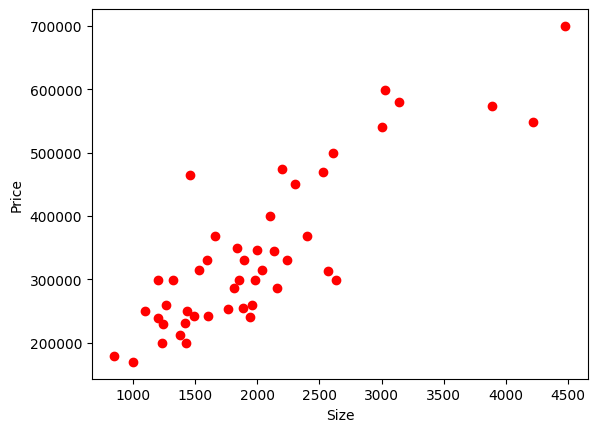

In [11]:
plt.scatter(df.Size, df.Price, color = 'red')
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

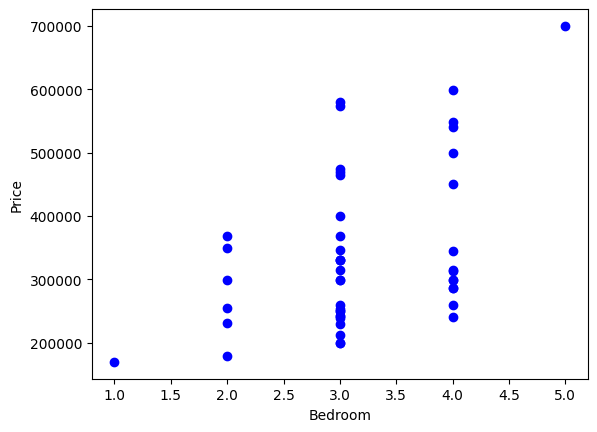

In [12]:
plt.scatter(df.Bedroom, df.Price, color = 'blue')
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.show()

In [16]:
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
test = df[~mask]

In [19]:
train_x = np.asanyarray(train[['Size']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Size']])
test_y = np.asanyarray(test[['Price']])

poly = PolynomialFeatures(degree= 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.0000000e+00, 2.1040000e+03, 4.4268160e+06],
       [1.0000000e+00, 2.4000000e+03, 5.7600000e+06],
       [1.0000000e+00, 1.4160000e+03, 2.0050560e+06],
       [1.0000000e+00, 1.9850000e+03, 3.9402250e+06],
       [1.0000000e+00, 1.3800000e+03, 1.9044000e+06],
       [1.0000000e+00, 1.4940000e+03, 2.2320360e+06],
       [1.0000000e+00, 1.9400000e+03, 3.7636000e+06],
       [1.0000000e+00, 2.0000000e+03, 4.0000000e+06],
       [1.0000000e+00, 1.8900000e+03, 3.5721000e+06],
       [1.0000000e+00, 4.4780000e+03, 2.0052484e+07],
       [1.0000000e+00, 1.2680000e+03, 1.6078240e+06],
       [1.0000000e+00, 2.3000000e+03, 5.2900000e+06],
       [1.0000000e+00, 1.3200000e+03, 1.7424000e+06],
       [1.0000000e+00, 2.6090000e+03, 6.8068810e+06],
       [1.0000000e+00, 3.0310000e+03, 9.1869610e+06],
       [1.0000000e+00, 1.7670000e+03, 3.1222890e+06],
       [1.0000000e+00, 1.8880000e+03, 3.5645440e+06],
       [1.0000000e+00, 1.6040000e+03, 2.5728160e+06],
       [1.0000000e+00, 1.962

In [21]:
reg = linear_model.LinearRegression()
train_y_ = reg.fit(train_x_poly, train_y)
print('Coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Coefficients:  [[0.00000000e+00 1.21791869e+02 1.54710071e-03]]
Intercept:  [91912.40055726]


Text(0, 0.5, 'Price')

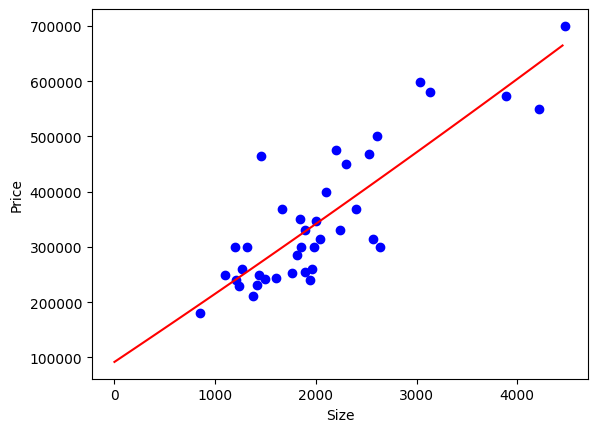

In [32]:
plt.scatter(train.Size, train.Price, color = 'blue')
xx = np.arange(0.0, 4478, 50)
yy = reg.intercept_[0] + reg.coef_[0][1] * xx + reg.coef_[0][2] * np.power(xx, 2)
plt.plot(xx, yy, '-r')
plt.xlabel('Size')
plt.ylabel('Price')

In [33]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = reg.predict(test_x_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 48694.01
Residual sum of squares (MSE): 2767780171.87
R2-score: 0.77
